### 머신러닝 개념 
#### 선형회귀(Linear Regression) : 1차 함수, 직선의 방정식
- 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정
- 편향(Bias) : 기본 출력값이 활성화되는 정도를 설정

#### 비용함수(Cost Function)
- cost(비용) = 오차 = 에러 = 손실(loss)
- cost(W,b) = (H(x) - y)^2

#### 예측(가설 ,Hypothesis) 함수
- H(x) = WX + b
   
#### 경사하강법(Gradient Descent Alogorithm)
- 비용이 가장 작은 기울기값을 구하는 알고리즘

In [6]:
# 비용함수 구현
def cost(x,y,w) :
    c = 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (hx - y[i])**2
        c += loss        
    return c/(len(x))

x = [1,2,3]
y = [1,2,3]
# y = [2,4,6]
# y = [1,3,5]
print(cost(x,y,-1))
print(cost(x,y,0))
print(cost(x,y,1))        
print(cost(x,y,2))  
print(cost(x,y,3))  

import matplotlib.pyplot as plt
# 비용함수의 그래프 출력
# x축 : w (기울기)
# y축 : cost (비용)
for i in range(-30,50):
    w = i/10
    c = cost(x,y,w)
#     print(w,c)
    plt.plot(w,c,'ro')
plt.show()

18.666666666666668
4.666666666666667
0.0
4.666666666666667
18.666666666666668


<Figure size 640x480 with 1 Axes>

In [7]:
# 미분 : 순간 변화량, 기울기
#    x축으로 1만큼 움직였을 때 y축으로 움직인 거리

# y = 3       ===>   y' = 0
# y = 2x      ===>   y' = 2
# y = x^2     ===>   y' = 2x
# y = (x+1)^2 ===>   y' = 2(x+1)

In [23]:
# 경사하강법(GD)

def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w * x[i]   # 예측함수
        loss = (hx - y[i])*x[i]  # 비용함합수의 미분값
        # loss  = w^2 * x[i]^2 - 2 * w*x[i]*y[i] + y[i]^2
        #  loss' = 2*w * x[i]^2 - 2 * x[i]*y[i] = x[i](hx - y[i])
        c += loss
    return c/len(x)

# train  : 학습
x = [1,2,3]
y = [1,2,3]
# y = [3,6,7]

w,old= 10,100
for i in range(100):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad  # learning rate(학습율) :0.1
#     print(i,c,old,w,grad)
    
    if c >= old and abs(c - old) < 1.0e-15:
        break
    old = c
    
print('weight:',w) # weight: 1.0

# predict
x = 5
hx = w*x
print('x=5 H(x):',hx)
print('x=11 H(x):',w*11)
        

weight: 1.0
x=5 H(x): 5.0
x=11 H(x): 11.0


### 퍼셉트론 : 다수의 신호를 입력받아서 하나의 신호로 출력


In [25]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta: # 임계값
        return 0
    elif tmp > theta:
        return 1
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

# XOR Problem :  학습해서 해결 불가능하다

0
0
0
1


### Boston 주택가격 예측
#### scikit-learn 사용

         CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  MEDV
0     2.30040   0.0  19.58  0.605  6.319  96.1  2.1000  403     14.7  23.8
1    13.35980   0.0  18.10  0.693  5.887  94.7  1.7821  666     20.2  12.7
2     0.12744   0.0   6.91  0.448  6.770   2.9  5.7209  233     17.9  26.6
3     0.15876   0.0  10.81  0.413  5.961  17.5  5.2873  305     19.2  21.7
4     0.03768  80.0   1.52  0.404  7.274  38.3  7.3090  329     12.6  34.6
..        ...   ...    ...    ...    ...   ...     ...  ...      ...   ...
395   0.23912   0.0   9.69  0.585  6.019  65.3  2.4091  391     19.2  21.2
396   0.04560   0.0  13.89  0.550  5.888  56.0  3.1121  276     16.4  23.3
397   1.38799   0.0   8.14  0.538  5.950  82.0  3.9900  307     21.0  13.2
398   7.36711   0.0  18.10  0.679  6.193  78.1  1.9356  666     20.2  11.0
399   0.14150   0.0   6.91  0.448  6.169   6.6  5.7209  233     17.9  25.3

[400 rows x 10 columns]


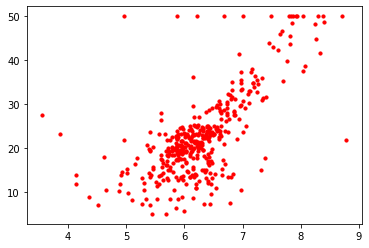

In [71]:
import numpy as np
import pandas as pd

# Boston 주택가격 데이터셋을 가져오기
# from sklearn.datasets import load_boston
# boston = load_boston()
# print(type(boston.data))
# print(boston.DESCR) # 정보를 출력

df = pd.read_csv('boston_train.csv')
import matplotlib.pyplot as plt
# plt.scatter(boston.data[:,5],boston.target,color='r',s=10)
plt.scatter(df['RM'],df['MEDV'],color='r',s=10)
print(df)
plt.show()   # X: 'RM'  , Y : 'MEDV'
# print(boston.data)

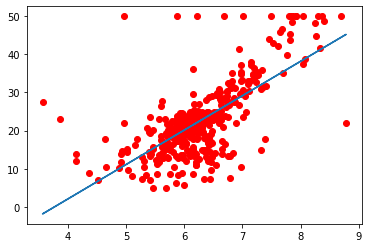

In [65]:
# 1 차원 회귀 모형의 예측

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = df['RM'].values.reshape(-1,1) # 2차원, (n,1)
y = df['MEDV'].values.reshape(-1,1)

# x = boston.data[:,5]
# x_1 = np.atleast_2d(x)  # 2차원 (1,n)
# x_2 = np.transpose(x_1) # (n,1)

lr.fit(x,y)  # 회귀 모형을 생성, 학습

# 예측
y_predicted = lr.predict(x)
plt.scatter(x,y,color='r')
plt.plot(x,y_predicted)
plt.show()


In [70]:
# 적합도 측정
# RMSE(Root Mean Squared Error) ,평균 제곱근 오차

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE:',rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y,lr.predict(x))
print('r2_score:',r2)

RMSE: 6.964958263761021
r2_score: 0.46928062004385107


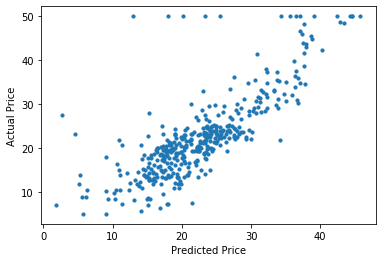

RMSE: 5.753475905312981
r2_score: 0.6378499850549992
RMSE: 4.168349275328514


In [89]:
# 다차원 회귀

x = df.iloc[:,:-1]    # (400, 9)
y = df['MEDV'].values.reshape(-1,1)  # (400, 1)
lr.fit(x,y)  # 회귀 모형을 생성, 학습

y_predict = lr.predict(x) # 예측
# print(x,y_predict)

plt.scatter(y_predict,y,s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

mse = mean_squared_error(y,lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # RMSE: 5.753475905312981

r2 = r2_score(y,lr.predict(x))
print('r2_score:',r2)


# test 데이터 셋을 사용한 예측
test = pd.read_csv('boston_test.csv')
x_test = test.iloc[:,:-1]    # (400, 9)
y_test = test['MEDV'].values.reshape(-1,1)  # (400, 1)

y_test_predict = lr.predict(x_test) # 예측
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # RMSE: 4.168349275328514

### 랜덤포리스트(RandomForest)

-   의사 결정트리(Decision Tree) 기반 분류 알고리즘
-   Ensemble, Bagging(결정트리를 여러개 사용)

##### 앙상블(Ensemble)
 - (1) Bagging : 같은 유형의 알고리즘을 결합
 
 - (2) Voting : 서로 다른 알고리즘을 가진 분류기를 결합

In [102]:
# RandomForestClassifier 예제
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 읽어오기
mr = pd.read_csv('mushroom.csv',header=None)
mr

# label = []
# data = []
label = mr.iloc[:,0]    # target, Y값(답) , (p)oisonous, (e)dible
type(label)
data = mr.iloc[:,1:]    # X값 22개의 feature   (8124, 22)
type(data)

# 데이터 내부의 기호를 숫자로 변환하기
label = []   # Y
data = []    # X
attr_list = []
for row_index,row in mr.iterrows():
#     label.append(row.ix[0]) 
    label.append(row.iloc[0]) 
    row_data = []
#    for v in row.ix[1:]:
    for v in row.iloc[1:]:        
        row_data.append(ord(v))
    data.append(row_data)
# print(label)
# print(data)

# train(학습) 전용과 test(예측) 전용 데이터로 나누기
data_train,data_test,label_train,label_test = \
    train_test_split(data,label)
print(len(data_train))  # 6093       75%
print(len(data_test))   # 2031       25%
print(len(label_train))
print(len(label_test))

# 학습 시키기
# 답이 2가지 이므로 binary classification
clf = RandomForestClassifier(n_estimators=100)  # 결정트리의 갯수=100
clf.fit(data_train,label_train)

# 데이터 예측하기
predict = clf.predict(data_test)
# print(predict)
# print(label_test)
ac_score = metrics.accuracy_score(label_test,predict)
print('정답률:',ac_score)  # 1.0  100% 정확도
cl_report = metrics.classification_report(label_test,predict)
print('리포트:\n',cl_report)

6093
2031
6093
2031
정답률: 1.0
리포트:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1038
           p       1.00      1.00      1.00       993

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [105]:
ord('a') - 97


0

### PCA(Principal Component Analysis) : 주성분 분석
- 차원 축소 알고리즘, 비지도 학습
- 이미지 데이터의 차원 축소, 자연언어 텍스트 의미 분석

- 과적합을 방지할수 있다

#### 비지도 학습 : 차원축소, 군집화

In [47]:
# PCA 예제

from sklearn.datasets import load_iris
import pandas as df
import matplotlib.pyplot as plt
%matplotlib inline

# iris 데이터를 가져오기
iris = load_iris()
type(iris)  # sklearn.utils.Bunch ==> numpy array의 묶음
type(iris.data)    # X     numpy array
type(iris.target)  # Y     numpy array 
# numpy array를 DataFrame으로 변환
# sepal : 꽃받침    
# petal : 꽃잎
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df  # 원본 컬럼 이름을 출력

# 컬럼 이름을 새로 만들어서 데이터 프레임을 생성
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data,columns=columns)

# target 은 'setosa' : 0,  'versicolor' : 1   ,'virginica':2
# 답이 3개 이상인 multi-classification 
iris_df['target'] = iris.target
iris_df  # (150, 5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


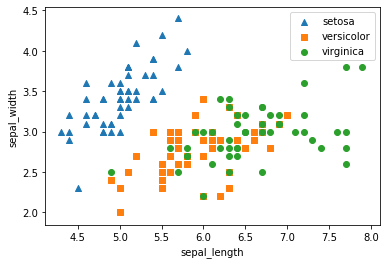

In [48]:
# 원본 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal_length']
    y = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [56]:
# 데이터를 표준화하여 정규분포로 전처리
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df)
# iris_scaled

# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 축소될 차원 설정: 2차원
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)  #  (150,2)

# PCA 변환 데이터를 target을 추가하여 데이터 프레임으로 변경
pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


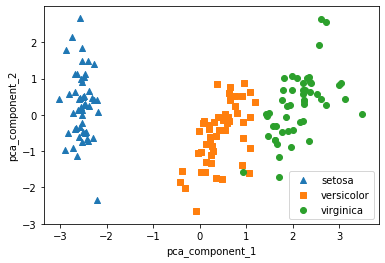

In [57]:
# PCA 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [58]:
# 변동성 비율 : 76.7% + 18.2% ==> 95%
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [68]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156,n_estimators=100)

# 원본 데이터로 교차 검증
scores = cross_val_score(rcf,iris.data,iris.target,
                         scoring='accuracy', cv=3)
print(scores)
# [0.98039216 0.92156863 0.95833333]

[0.98039216 0.92156863 0.95833333]


In [69]:
# PCA 데이터로 교차 검증
# pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
pca_x = iris_df_pca.iloc[:,:-1]
scores_pca = cross_val_score(rcf,pca_x,iris.target,
                         scoring='accuracy', cv=3)
print('pca score:',scores_pca)
# pca score: [0.98039216 0.98039216 1.        ]
# 결론 PCA 변환하여 예측한 결과의 정확도가 약간 상승했다

pca score: [0.98039216 0.98039216 1.        ]


### 차원이 매우 많은 경우의 PCA 변환 예제

In [72]:
# 신용카드 고객데이터  가져오기
import pandas as pd

df = pd.read_excel('credit_card.xls',sheet_name='Data')
df.shape     # (30000, 24)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [80]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},
                  inplace=True)
X_features = df.drop('default',axis = 1)
X_features.shape   # (30000, 23)
Y_target = df['default']
Y_target.shape     # (30000, 23)

X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


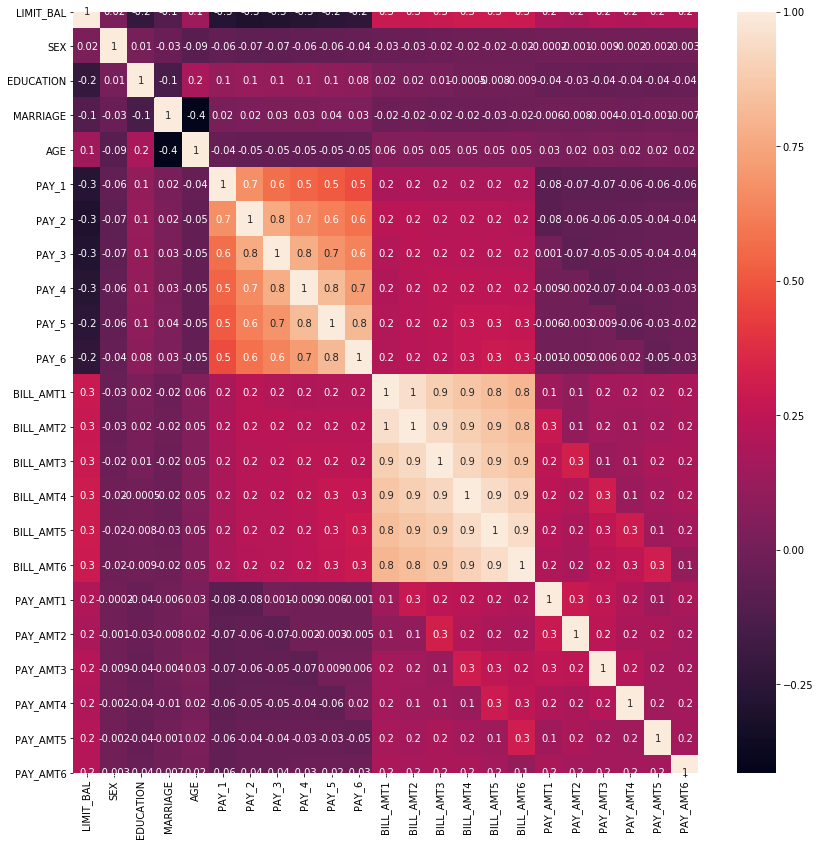

In [89]:
# seaborn 사용 변수간의 상관관계를 heatmap 출력
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [97]:
# PCA 변환 : BILL_AMT1 ~ BILL_AMT6 6개를 2개로 축소
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('상관관계가 높은 속성명:',cols_bill)
# df.columns.values[11:17]

# 6개 컬럼의 데이터를 표준화
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# PCA 변환   : 6개를 2개로 축소
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:',pca.explained_variance_ratio_)
#  [0.90555253 0.0509867 ]  # 95.5% 

상관관계가 높은 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [100]:
# 원본 데이터 사용 예측의 정확도 측정 
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf,X_features,Y_target,scoring='accuracy',cv=3)
print("cv=3 원본데이터 예측 정확도:",scores)
print('평균정확도:',np.mean(scores))  # 81.7%

cv=3 원본데이터 예측 정확도: [0.8083 0.8196 0.8232]
평균정확도: 0.8170333333333333


In [101]:
# PCA 변환한 데이터를 사용한 예측의 정확도 측정 : 전체를 6개로 축소
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf,df_scaled,Y_target,
                             scoring='accuracy',cv=3)
print("cv=3 PCA 변환 데이터 예측 정확도:",scores_pca)
print(' PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))  # # 81.6%

cv=3 PCA 변환 데이터 예측 정확도: [0.8083 0.8194 0.8229]
 PCA 변환 데이터 평균 정확도: 0.8168666666666665


##### 과적합(Overfitting) : 학습 데이터에서는 예측 정확도 높이나오는데
##### 학습에 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 정확도가 떨어지는 경우

### 군집화(Clustering,클러스터링)
#### 비지도 학습

#####  K-means(K-평균) , Mean Shift(평균이동), 친근도전파


### K-means(K-평균) 
- N개의 표본을 K개의 군집으로 나눈다
- 군집화중 가장 많이 사용, 쉽고 간결하다
- 속성(변수)의 갯수가 너무 많으면 정확도가 떨어져서 PCA로 차원 감소가 필요
- 몇개의 군집을 선택해야할지 어렵다

In [8]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
columns = ['sepal_length',
           'sepal_width',
           'petal_length',
           'petal_width']
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF.shape # (150, 4)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
# sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10,
# max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, 
# random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0).fit(irisDF)
print(kmeans)
type(kmeans)  #sklearn.cluster.k_means_.KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


sklearn.cluster.k_means_.KMeans

In [10]:
print(kmeans.labels_)      # 각 데이터트가 속한 군집 중심점의 레이블
print(kmeans.cluster_centers_) # 중심점 실제 좌표값

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [11]:
pd.set_option('display.max_rows',500)
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
irisDF['cluster'] = kmeans.labels_  # 원본 소스에 누락된 라인!!
irisDF['target'] = iris.target
irisDF
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
# target이 0인 데이터는 1번 군집에 50개
# target이 1인 데이터는 0번 군집에 48개,2번 군집에 2개
# target이 2인 데이터는 0번 군집에 4개, 2번 군집에 36개로 생성

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [13]:
# KMeans기초예제 : scikit-learn 도움말의 Example
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])  # (6,2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

array([[10.,  2.],
       [ 1.,  2.]])

In [14]:
# iris 군집화 결과를 시각화하기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
# irisDF

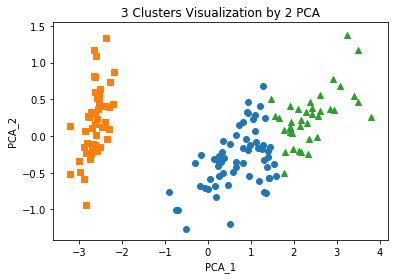

In [15]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index  # 0번 군집의 행번호
marker1_ind = irisDF[irisDF['cluster'] == 1].index  # 1번 군집의 행번호
marker2_ind = irisDF[irisDF['cluster'] == 2].index  # 2번 군집의 행번호

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'] , 
            y=irisDF.loc[marker0_ind,'pca_y'], marker='o')

plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'] , 
            y=irisDF.loc[marker1_ind,'pca_y'], marker='s')

plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'] , 
            y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA')
plt.show()
# Cluster 1(네모)는 다른 군집과 명확히 군집화 되었음
# Cluster 0(동그라미) 과 Cluster 2(세모)는 덜 분리되어짐

### 군집 평가(Clustaer Evaluation)

In [16]:
# 실루엣(silhouette) 분석
# 실루엣 계수 : 군집화의 지표, 높을수로 좋음

from sklearn.metrics import silhouette_samples,silhouette_score


kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(iris.data,irisDF['cluster'])
# print(score_samples)   # (150,)

irisDF['silhouette_coeff'] = score_samples
irisDF

# silhouette_score( ): 평균 실루엣 계수를 구함
average_score = silhouette_score(iris.data,irisDF['cluster'])
print('iris K-means 평균 실루엣 계수:',average_score) # 0.55

iris K-means 평균 실루엣 계수: 0.5528190123564091


In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

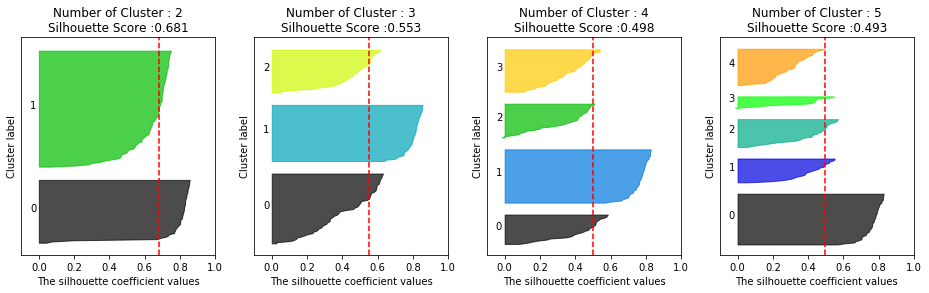

In [18]:
visualize_silhouette([2,3,4,5],iris.data)

In [19]:
from sklearn.base import TransformerMixin

class A(TransformerMixin):
    def fit(self,X):
        print('fit:',X)
        return self
    
    def transform(self,X):
        print('trans:',X)  
        return X
    
inst = A()
inst.fit('x_data')
inst.transform('y_data')
inst.fit_transform('my_data')

# <출력>

# fit: x_data
# trans: y_data
# fit: my_data
# trans: my_data

fit: x_data
trans: y_data
fit: my_data
trans: my_data


'my_data'

### 평균이동(Mean Shift)
- 대역폭(bandwith)를 사용하여밀도가 높는곳으로 이동하여 중심을 찾는다
- cluster(군집)의 갯수를 지정하지 않아도 자동으로 설정된다
- 이미지나 영상데이터 처리에 자주 사용된다

In [119]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# make_blobs(): 임의의 데이터셋을 생성
x, y = make_blobs(n_samples=200,n_features=2, centers=3,
                 cluster_std=0.6, random_state=0)  # 원본소스수정 0.8-->0.6
print('x:',x.shape)  # (200,2)
print('y:',y.shape)  # (200,)

# bandwidth=0.62일때  --> 8개 cluster
meanshift = MeanShift(bandwidth=0.62)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))  

# bandwidth=1.114 일때  --. 3개 cluster
meanshift = MeanShift(bandwidth=1.114)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))


x: (200, 2)
y: (200,)
cluster labels: [0 1 2 3 4 5 6 7]
cluster labels: [0 1 2]


In [120]:
# bandwidth 의 최적값을 구하기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x, quantile=0.2)
print('bandwidth:',round(bandwidth,3) ) # 1.114

bandwidth: 1.114


In [121]:
# 평균이동(Mean Shift) 및 시각화

import pandas as pd

clusterDF = pd.DataFrame(data=x,columns=['ftr1','ftr2'])
clusterDF['target'] = y     # [0,1,2]
clusterDF

# estimate_bandwidth() 사용하여 최적의 bandwidth계산
best_bandwidth = estimate_bandwidth(x,quantile=0.2)
print(best_bandwidth)

meanshift = MeanShift(bandwidth=best_bandwidth) # 원본소스 오타
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))

1.113759224777449
cluster labels: [0 1 2]


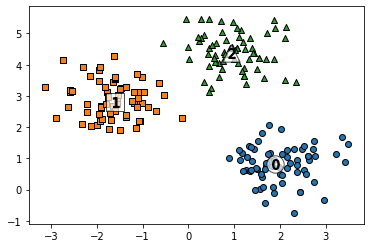

target  meanshift_label
0       2                  67
1       0                  67
2       1                  66
Name: meanshift_label, dtype: int64


In [122]:
# matplotlib로 시각화
clusterDF['meanshift_label'] = cluster_labels
# clusterDF
centers = meanshift.cluster_centers_
# centers
unique_labels = np.unique(cluster_labels)   # [0 1 2]
markers = ['o','s','^','x','*']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],
               edgecolor='k',marker=markers[label])
    # 중심점(center)을 표시
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=300,color='white',
               edgecolor='k',alpha = 0.7, marker=markers[label])

    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=100,color='k',
               edgecolor='k', marker='$%d$'%label)
              
    
plt.show()
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

In [126]:
# 실루엣(silhouette) 분석
# 실루엣 계수 : 군집화의 지표, 높을수로 좋음

from sklearn.metrics import silhouette_samples,silhouette_score

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(x,clusterDF['meanshift_label'])
# print(score_samples)   

clusterDF['silhouette_coeff'] = score_samples
clusterDF

# silhouette_score( ): 평균 실루엣 계수를 구함
average_score = silhouette_score(x,clusterDF['meanshift_label'])
print('Mean Shift 평균 실루엣 계수:',average_score) # 0.677

Mean Shift 평균 실루엣 계수: 0.6771591392061186


cluster_centers: [[ 0.92284077 -0.94786827]
 [-0.92331159 -0.99553816]
 [ 0.98305835  0.89701482]]
number of estimated clusters : 3


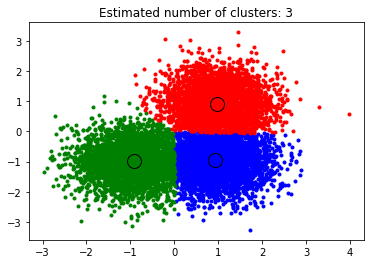

In [35]:
# A demo of the mean-shift clustering algorithm
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]